In [1]:
%cd ../../
%load_ext autoreload
%autoreload 2

/media/olle/DATA/Projects/orderbookrl


In [2]:
from orderbookrl.evaluate.collect_data import load_env_agent, run_through_all_data
import pandas as pd
%matplotlib inline

In [3]:
agent_id = 'PPO'
path = 'logs/marketorderenv/ppo/PPOADV_MarketOrderEnv-v0_0_2018-08-31_20-19-12goc1zwg8/'
checkpoint = 72
data_dir = '/media/olle/DATA/Projects/orderbookrl/data/test/'
env, agent = load_env_agent(agent_id, path, checkpoint, data_path=data_dir)
result, trades, states, actions, rewards, quotes = run_through_all_data(env, agent)

Process STDOUT and STDERR is being redirected to /tmp/raylogs/.
Waiting for redis server at 127.0.0.1:46670 to respond...


Using custom preprocessor mv


Waiting for redis server at 127.0.0.1:31635 to respond...
Starting local scheduler with the following resources: {'CPU': 8, 'GPU': 1}.

View the web UI at http://localhost:8889/notebooks/ray_ui86693.ipynb?token=c9ac4653f404ad14b0be0cc30dfa39b2a67eb6f27c830de5



Created LogSyncer for /home/olle/ray_results/2018-08-31_21-18-53x4oxpwlf -> None
Using custom preprocessor mv


/home/olle/miniconda3/envs/orderbookmdp/lib/python3.6/site-packages/pandas/io/feather_format.py:112: FutureWarning:

`nthreads` argument is deprecated, pass `use_threads` instead

/home/olle/miniconda3/envs/orderbookmdp/lib/python3.6/site-packages/pandas/io/feather_format.py:112: FutureWarning:

`nthreads` argument is deprecated, pass `use_threads` instead



2018-04-04T19:57:58.975000Z 1.065239321281138
2018-04-05T01:32:31.068000Z 1.1152069366132797
2018-04-05T05:17:55.402000Z 1.1997755100934102
2018-04-05T10:14:06.687000Z 1.2493518286584357
2018-04-05T14:16:59.289000Z 1.2773296466302981
2018-04-05T17:00:16.570000Z 1.2958302945869145
2018-04-05T19:59:00.332000Z 1.3338282653874456
2018-04-06T01:45:10.632000Z 1.376510600516695
2018-04-06T08:08:40.142000Z 1.4151977099122017
2018-04-06T15:42:04.144000Z 1.4421007749802681
2018-04-07T01:01:37.895000Z 1.504118354635131
2018-04-07T11:30:34.614000Z 1.5314977770724953
2018-04-08T00:47:01.025000Z 1.6196175809370246
2018-04-08T16:45:46.162000Z 1.679875129276867
2018-04-09T05:18:34.113000Z 1.7506126629053558
2018-04-09T12:05:12.857000Z 1.7592005796418664
2018-04-09T20:23:23.284000Z 1.7871643778501427
2018-04-10T03:49:13.801000Z 1.836642724194946
2018-04-10T13:01:00.061000Z 1.8504290202740703
2018-04-11T01:58:20.174000Z 1.9295802210094763
2018-04-11T21:33:06.261000Z 1.9723358104862825
2018-04-12T11:24:1

2018-06-02T03:56:50.324000Z 4.978583963243107
2018-06-02T14:28:44.935000Z 5.082258879684564
2018-06-08T01:32:50.760000Z 5.181419940777822
2018-06-08T12:59:34.875000Z 5.105880562676712
2018-06-08T23:34:11.247000Z 5.129710153254343
2018-06-09T09:31:32.367000Z 5.133508693538207
2018-06-09T17:11:36.748000Z 5.094037489986757
2018-06-10T00:56:38.452000Z 4.935545277903275


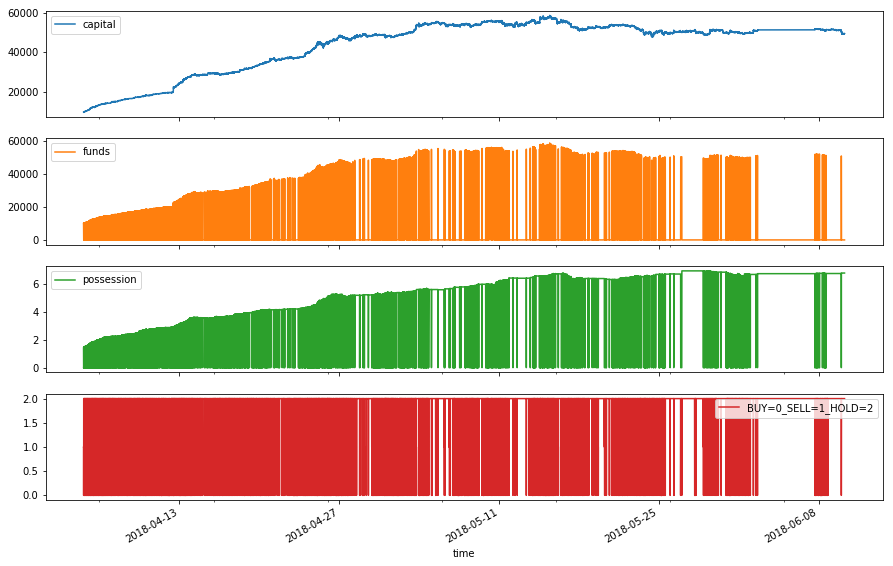

In [4]:
actions.columns = ['BUY=0_SELL=1_HOLD=2']
result.join(actions).plot(subplots=True, figsize=(15,10));

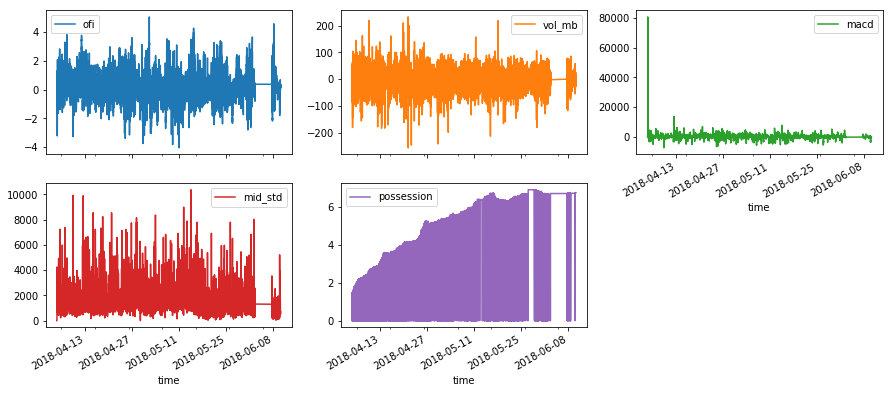

In [5]:
n_cols = 3
layout = (n_cols, 1+ int( (1+states.shape[1])/n_cols))
states.columns = ['ofi', 'vol_mb', 'macd', 'mid_std', 'possession']
states.plot(subplots=True, figsize=(15,10), layout=layout);

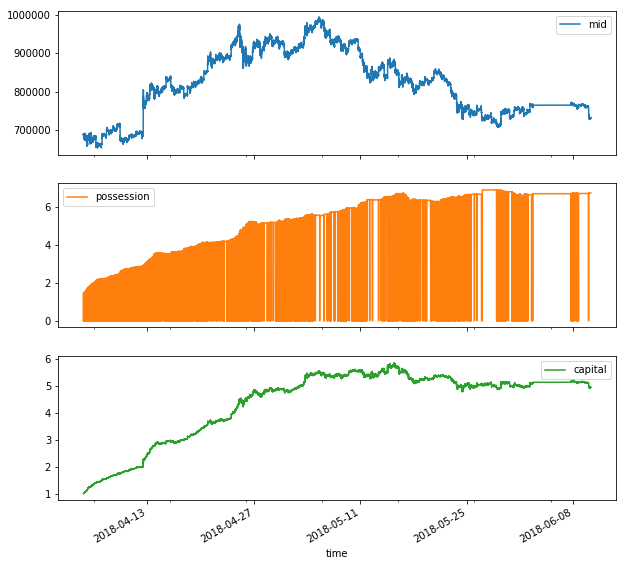

In [6]:
mid = (quotes['ask'] + quotes['bid'])/2
mid.name = 'mid'
temp = mid.to_frame().join(result.possession)
temp = temp.join(result.capital/result.capital[0])
temp.plot(subplots=True, figsize=(10,10));

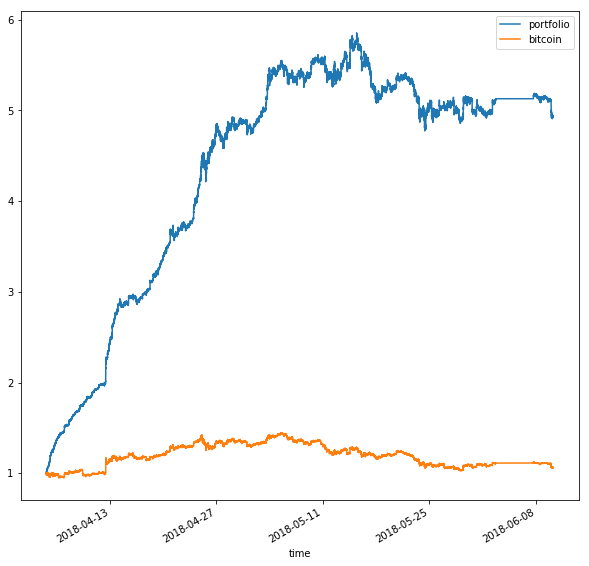

In [7]:
port_returns = result.capital.pct_change().iloc[1:]
port_cum_ret = (1+ port_returns).cumprod()
port_cum_ret.name = 'portfolio'
cum_returns = (1 + mid.pct_change().iloc[1:]).cumprod()
cum_returns.name = 'bitcoin'
temp = pd.concat([port_cum_ret, cum_returns], axis=1)
temp.plot(figsize=(10,10));

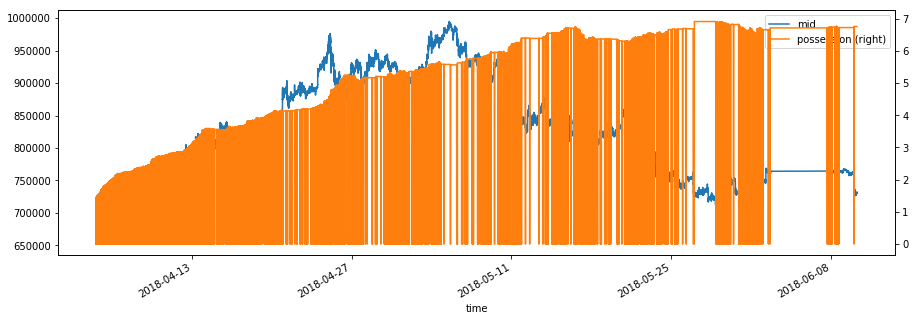

In [8]:
temp = mid.to_frame().join(result.possession)
temp.plot(secondary_y='possession', figsize=(15, 5));

In [9]:
port_returns.rolling(100).mean().nlargest(n=25)

time
2018-05-13 09:27:58.903    0.000243
2018-05-13 09:27:58.903    0.000243
2018-05-13 09:27:58.903    0.000243
2018-05-13 09:27:58.921    0.000243
2018-05-13 09:27:59.395    0.000242
2018-05-13 09:27:59.866    0.000242
2018-05-13 09:28:00.058    0.000242
2018-05-13 09:28:00.148    0.000242
2018-05-13 09:28:00.664    0.000241
2018-05-13 09:28:00.861    0.000241
2018-05-13 09:28:00.871    0.000240
2018-05-13 09:28:00.897    0.000240
2018-05-13 09:28:01.366    0.000239
2018-05-13 09:28:01.391    0.000231
2018-05-13 09:27:58.902    0.000210
2018-05-13 09:27:58.903    0.000209
2018-05-13 09:27:58.903    0.000207
2018-05-13 09:27:58.903    0.000207
2018-06-02 06:55:25.398    0.000184
2018-06-02 06:55:25.431    0.000184
2018-06-02 06:55:23.933    0.000183
2018-06-02 06:55:24.257    0.000183
2018-06-02 06:55:24.769    0.000182
2018-06-02 06:55:25.693    0.000182
2018-06-02 06:55:25.708    0.000181
Name: capital, dtype: float64

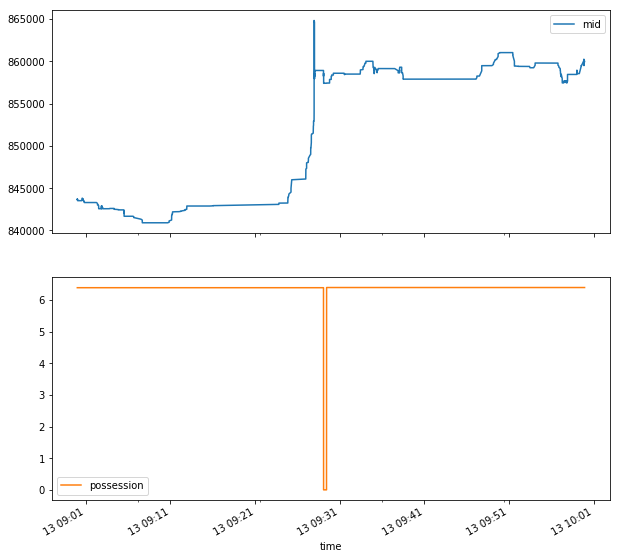

In [15]:
temp['2018-05-13 09'].plot(subplots=True, figsize=(10,10));

In [11]:
actions.head()

,BUY=0_SELL=1_HOLD=2
time,
2018-04-04 14:38:50.644,1
2018-04-04 14:38:54.342,1
2018-04-04 14:38:54.451,2
2018-04-04 14:38:54.612,2
2018-04-04 14:39:05.169,2


In [12]:
states.head()

,ofi,vol_mb,macd,mid_std,possession
time,,,,,
2018-04-04 14:38:50.644,0.000000,-14.616623,0.0,0.0,0.0
2018-04-04 14:38:54.342,0.009987,-9.618123,0.0,0.0,0.0
2018-04-04 14:38:54.451,0.038293,4.558920,0.0,0.0,0.0
2018-04-04 14:38:54.612,0.045502,8.205260,0.0,0.0,0.0
2018-04-04 14:39:05.169,0.038418,4.705260,0.0,0.0,0.0


In [13]:
states.shape

(1866638, 5)

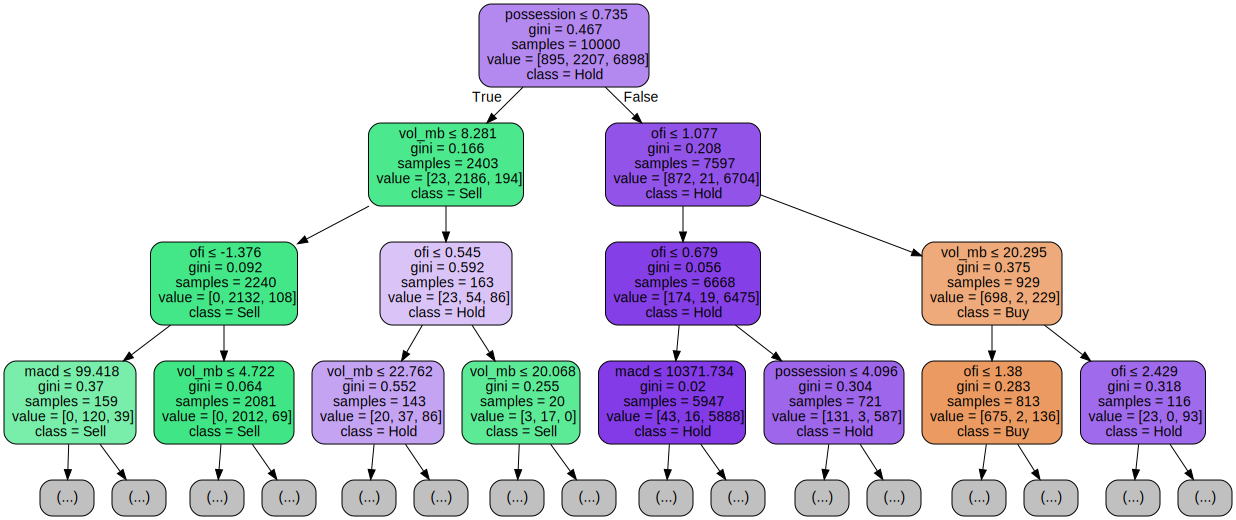

In [14]:
from sklearn import tree
import graphviz 
import numpy as np
np.random.seed(1)
n = 10000
idx = np.random.choice(np.arange(states.shape[0]), n)
reg = tree.DecisionTreeClassifier().fit(states.iloc[idx], actions.values[idx].ravel())
dot_data = tree.export_graphviz(reg, max_depth=3, out_file=None,
                         feature_names=states.columns, class_names=['Buy', 'Sell', 'Hold'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graphviz.Source(dot_data)  